In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,5)

Use the matrix motif M = [0.1, 0.2; 0.2, 0.5] to produce a multifractal image up to stage 8.                               
Use Python to produce a figure representation of the multifractal.

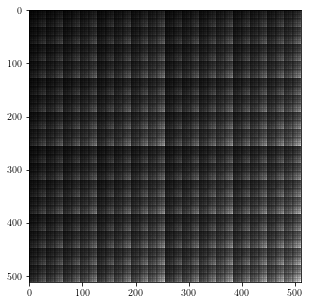

In [72]:
from skimage import exposure, io, img_as_uint

p1, p2, p3, p4 = 0.1, 0.2, 0.2, 0.5
p = [[p1, p2], [p3, p4]]
for k in range(1, 9, 1):
    M = np.zeros([2 ** (k + 1), 2 ** (k + 1)])
    M.tolist()
    for i in range(2**k):
        for j in range(2**k):
            M[i][j] = p1 * p[i][j]
            M[i][j + 2**k] = p2 * p[i][j]
            M[i + 2**k][j] = p3 * p[i][j]
            M[i + 2**k][j + 2**k] = p4 * p[i][j]
    p = M

# Plot the multifractal image.
M = exposure.adjust_gamma(M, 0.2)
plt.imshow(M, cmap='gray', interpolation='nearest')

im = np.array(M, dtype='float64')
im = exposure.rescale_intensity(im, out_range='float')
im = img_as_uint(im)
io.show()

$$ x = A+B x \cos(x^2+y^2)−B y \sin(x^2+y^2) \\
  y = B(x \sin(x^2 + y^2) + y \cos(x^2 + y^2) )$$
  
  where B is fixed at 0.15
  and A = 1, 2.2

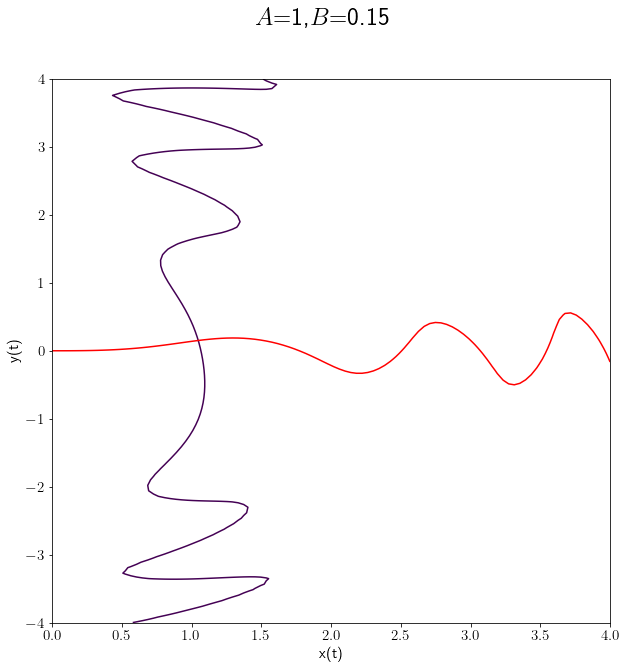

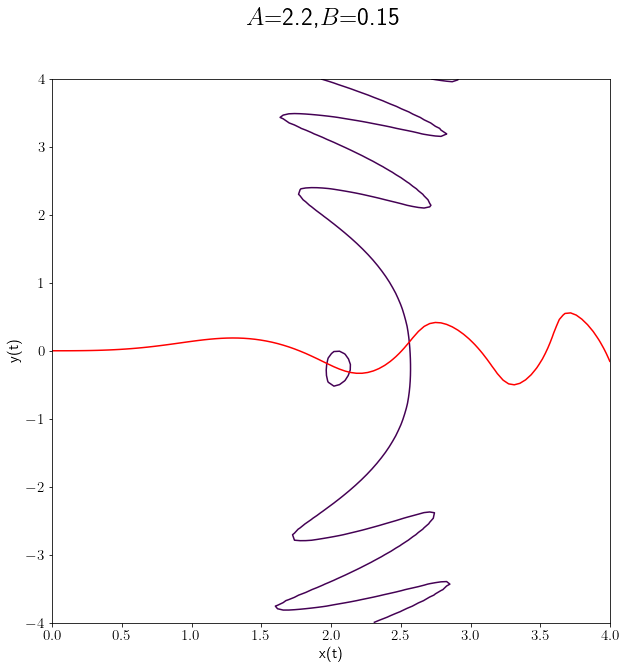

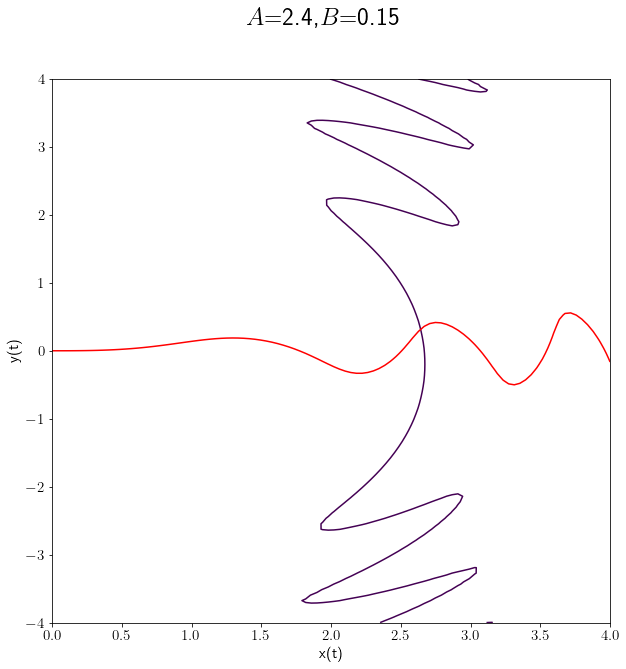

In [73]:
def Ikeda(A,B,n):
    
    x, y = np.mgrid[0:4:100j, -4:4:100j]
    z1 = A + B*x*np.cos(x**2 + y**2) - B*y*np.sin(x**2 + y**2) - x
    z2 = B*x*np.sin(x**2 + y**2) + B*y*np.cos(x**2 + y**2) - y

    fig, ax = plt.subplots(figsize=(10,10))
    ax.contour(x, y, z1, levels=[0])
    ax.contour(x, y, z2, levels=[0], colors='r')
    ax.set_xlabel('x(t)', fontsize=15)
    ax.set_ylabel('y(t)', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.suptitle(r'$A$={},$B$={}'.format(A,B), fontsize=25)
    plt.show()
    
A =[ 1, 2.2, 2.4]
B = 0.15
n = 50000
for A in A:
    Ikeda(A,B,n)

$\mathbf{Ikeda}$ map.
$$x_{n+1} = A + B(x_n \cos |En|^2 − y_n \sin |En|^2) \\
y_{n+1} = B(x_n \sin |En|^2 + y_n \cos |En|^2)$$

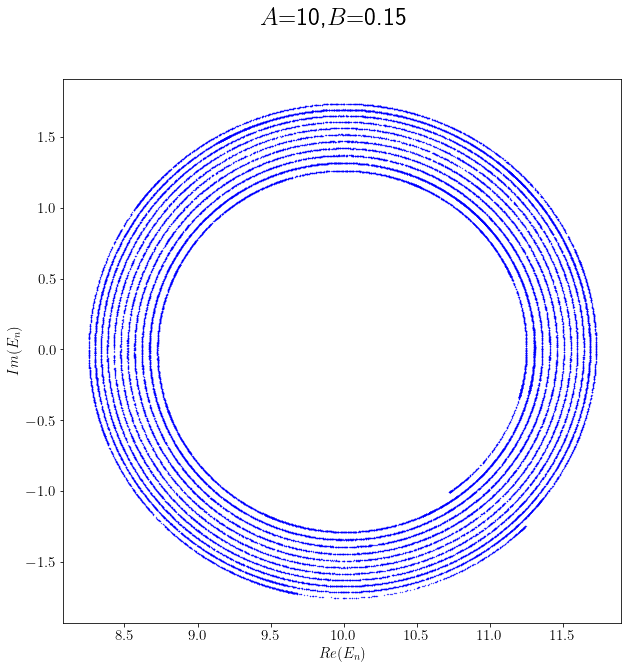

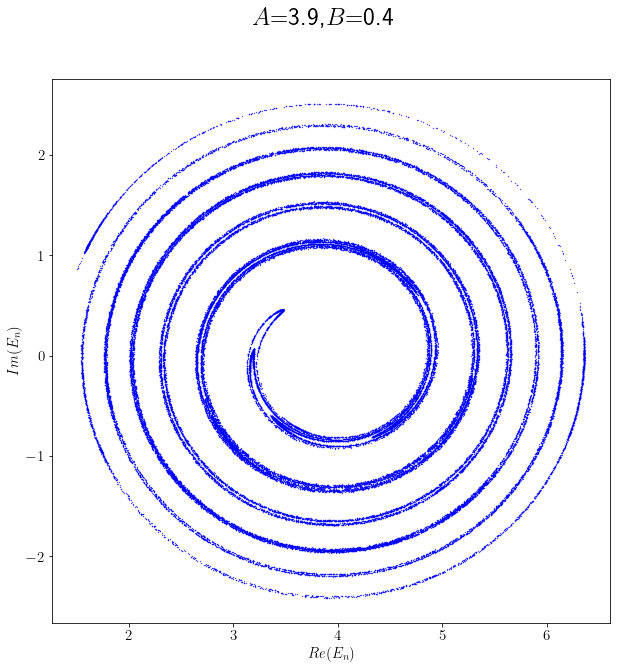

In [74]:
def Ikeda(A,B,n):
    
    def map_2d(X):
        x, y = X
        xn = A + B*x*np.cos(x**2 + y**2) - B*y*np.sin(x**2 + y**2)
        yn = B*x*np.sin(x**2 + y**2) + B*y*np.cos(x**2 + y**2)
        return (xn, yn)

    X0 = [A, 0]
    X, Y = [], []
    for i in range(n):
        xn, yn = map_2d(X0)
        X, Y = X + [xn], Y + [yn]
        X0 = [xn, yn]

    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(X, Y, color='blue', s=0.1)
    plt.xlabel('$Re(E_n)$', fontsize=15)
    plt.ylabel('$Im(E_n)$', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.suptitle(r'$A$={},$B$={}'.format(A,B), fontsize=25)
    plt.show()
    
A =[ 5,10,3.9 ]
B =[0.15,0.15,0.4] 
n = 50000
for A,B in zip(A,B):
    Ikeda(A,B,n)

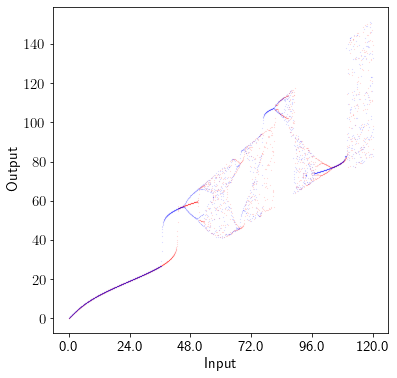

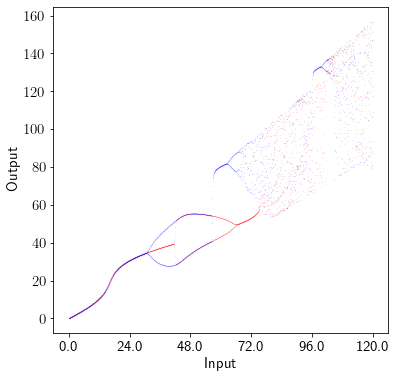

In [75]:
def Logistic_Ikeda(phi,kappa = 0.0225,Pmax=120,half_N = 1999,E1=0,E2=0):
    C = 0.345913
    N = 2*half_N + 1
    N1 = 1 + half_N
    esqr_up, esqr_down = [], []
    ns_up = np.arange(half_N)
    ns_down = np.arange(N1, N)

    # Ramp the power up
    for n in ns_up:
        E2 = E1 * np.exp(1j*((abs(C*E1))**2 - phi))
        E1 = 1j * np.sqrt(1 - kappa) * np.sqrt(n * Pmax / N1) + np.sqrt(kappa) * E2
        esqr1 = abs(E1)**2
        esqr_up.append([n, esqr1])

    esqr_up = np.array(esqr_up)

    # Ramp the power down
    for n in ns_down:
        E2 = E1 * np.exp(1j * ((abs(C*E1))**2 - phi))
        E1 = 1j * np.sqrt(1 - kappa) * np.sqrt(2 * Pmax - n * Pmax / N1) + np.sqrt(kappa) * E2
        esqr1 = abs(E1)**2
        esqr_down.append([N-n, esqr1])

    esqr_down=np.array(esqr_down)

    fig, ax = plt.subplots(figsize=(6,6))
    xtick_labels = np.linspace(0, Pmax, 6)
    ax.set_xticks([x / Pmax * N1 for x in xtick_labels])
    ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xtick_labels])

    plt.plot(esqr_up[:, 0], esqr_up[:, 1], 'r.', markersize=0.1)
    plt.plot(esqr_down[:, 0], esqr_down[:, 1], 'b.', markersize=0.1)
    plt.xlabel('Input', fontsize=15)
    plt.ylabel('Output', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.show()

pi=np.pi    
phi=[0,pi/4,pi/2,pi]
for phi in phi:
    Logistic_Ikeda(phi)

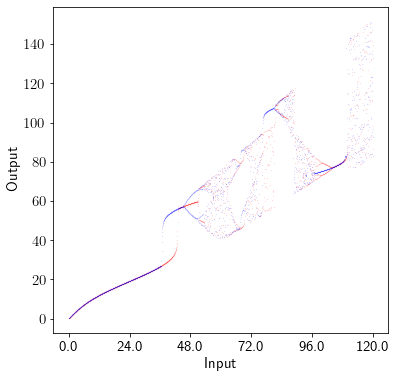

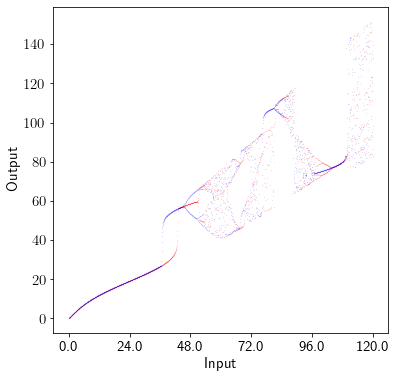

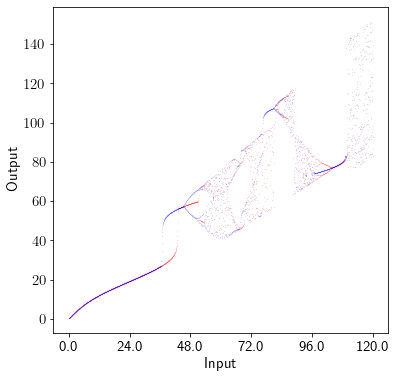

In [76]:
E1=[4.5,6.3,11]
for E1 in E1:
    Logistic_Ikeda(0,kappa = 0.0225,Pmax=120,half_N = 1999,E1=E1,E2=0)

3/5


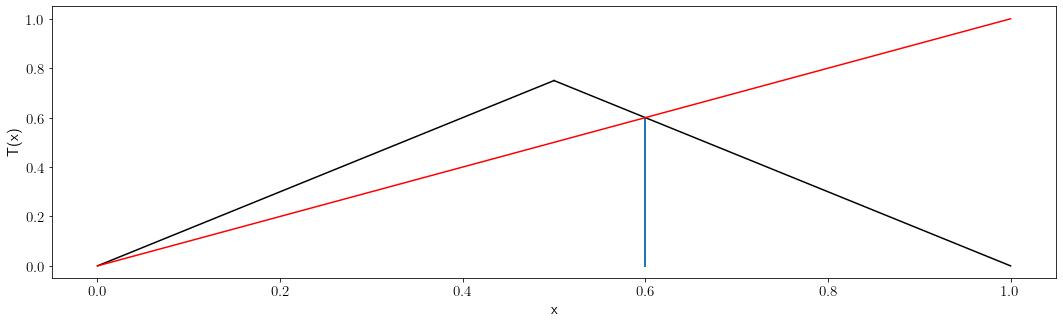

In [126]:
# Programs 14a: Graphical iteration of the tent map.
# See Figure 14.7(a).

from sympy import Rational
import numpy as np
import matplotlib.pyplot as plt

x = Rational(3,5)  # Initial value
inputs = np.array([x])
outputs = np.array([0])
print(x)
r=3/2
for i in range(2, 10):
    inputs = np.append(inputs, x)
    inputs = np.append(inputs, x)
    outputs = np.append(outputs, x)
    if x < Rational(1, 2):
        x = r * x
    elif x > Rational(1, 2):
        x = r*(1 - x)
    outputs = np.append(outputs, x)
   # print(x,inputs, outputs)

plt.plot(inputs, outputs, lw=2)

# Plot the tent function and line y=x.
X1 = np.linspace(0, 0.5, 100, endpoint=True)
X2 = np.linspace(0.5, 1, 100, endpoint=True)
X = np.linspace(0, 1, 200, endpoint=True)
plt.plot(X1, r*X1, 'k-')
plt.plot(X2, r*(1-X2), 'k-')
plt.plot(X, X, 'r-')
plt.xlabel('x', fontsize=15)
plt.ylabel('T(x)', fontsize=15)
plt.tick_params(labelsize=15)

plt.show()

In [147]:
from sympy import Rational
def Tri_coweb(xa,xb,r):
    x = Rational(xa,xb)  # Initial value
    inputs = np.array([x])
    outputs = np.array([0])

    for i in range(200):
        inputs = np.append(inputs, x)
        inputs = np.append(inputs, x)
        outputs = np.append(outputs, x)
        if x < Rational(1, 2):
            x = r * x
        elif x > Rational(1, 2):
            x = r * ( 1 - x )
        outputs = np.append(outputs, x)
    plt.plot(inputs, outputs, lw=2)
    X1 = np.linspace(0,0.5, 100, endpoint=True)
    X2 = np.linspace(0.5, 1, 100, endpoint=True)
    X = np.linspace(0, 1, 200, endpoint=True)
    plt.plot(X1, r*X1, 'k-')
    plt.plot(X2, r*(1-X2), 'k-')
    plt.plot(X, X, 'r-')
    plt.xlabel('x', fontsize=15)
    plt.ylabel('T(x)', fontsize=15)
    plt.tick_params(labelsize=15)
    plt.show()

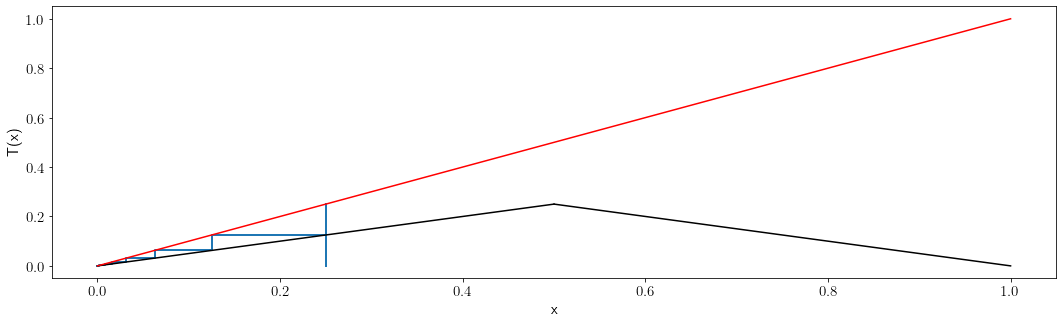

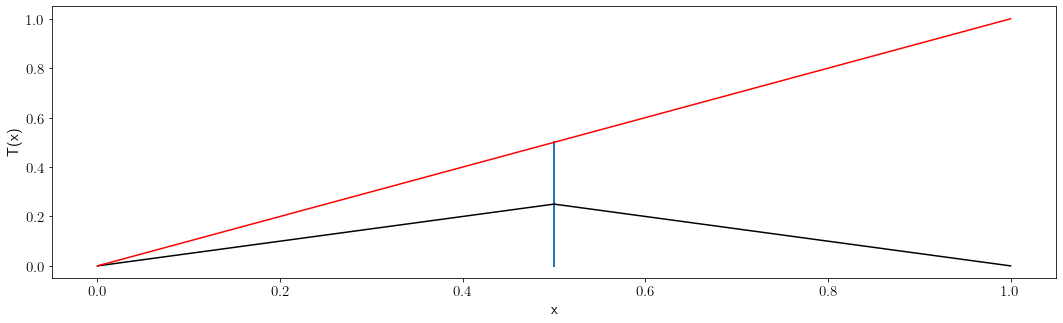

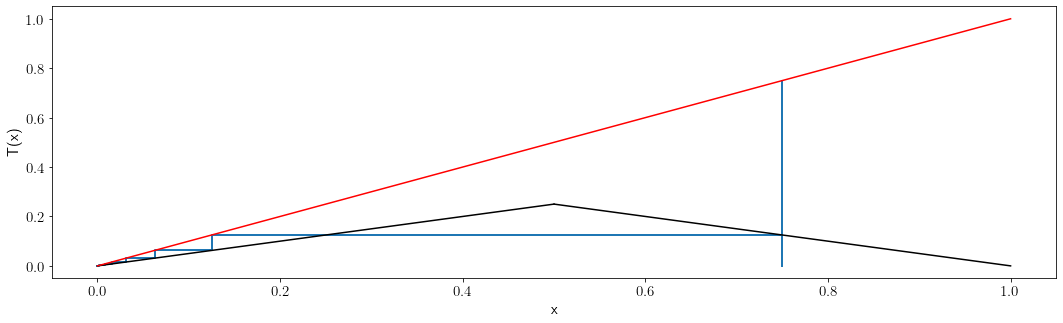

In [148]:
xa=[1,1,3]
xb=[4,2,4]
r=1/2
for xa,xb in zip(xa,xb):
    Tri_coweb(xa,xb,r)   

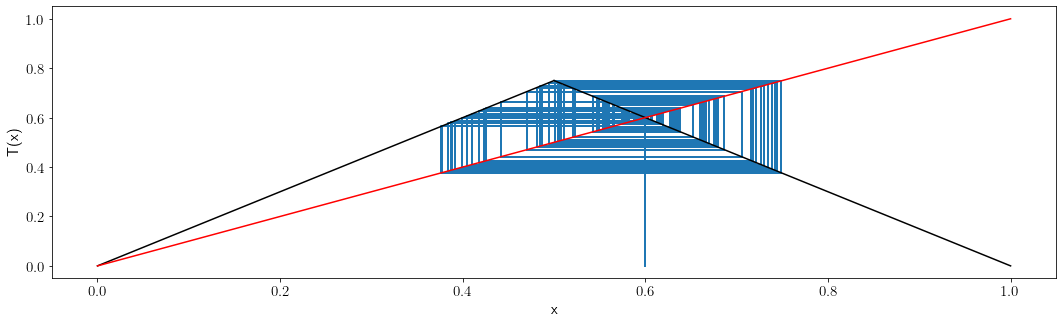

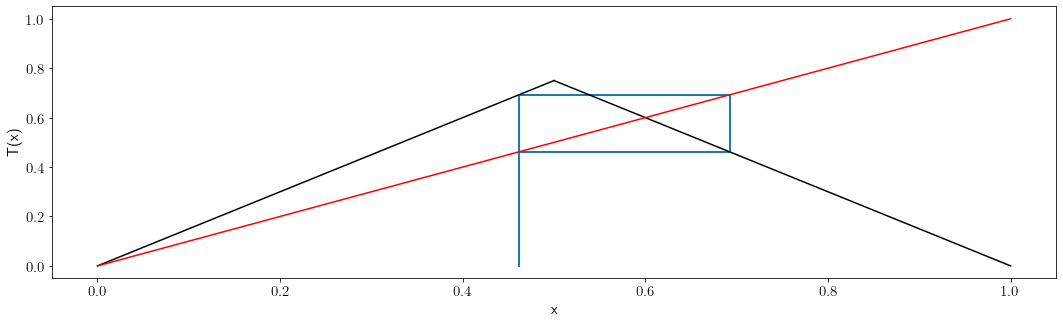

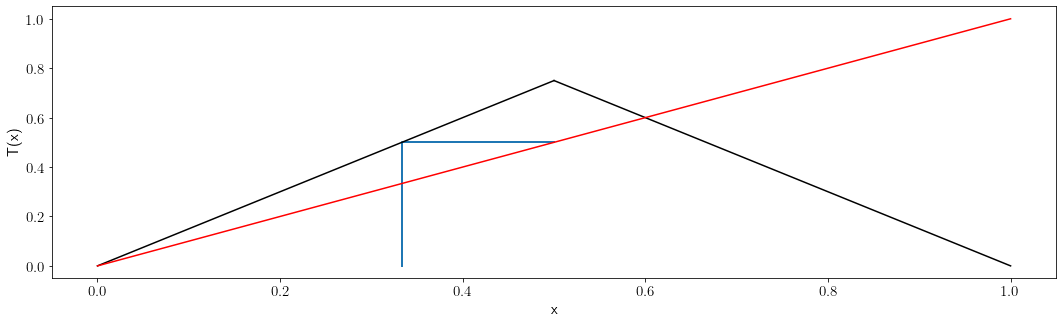

In [139]:
xa=[3, 6, 1]
xb=[5,13, 3]
r=3/2
for xa,xb in zip(xa,xb):
    Tri_coweb(xa,xb,r)    

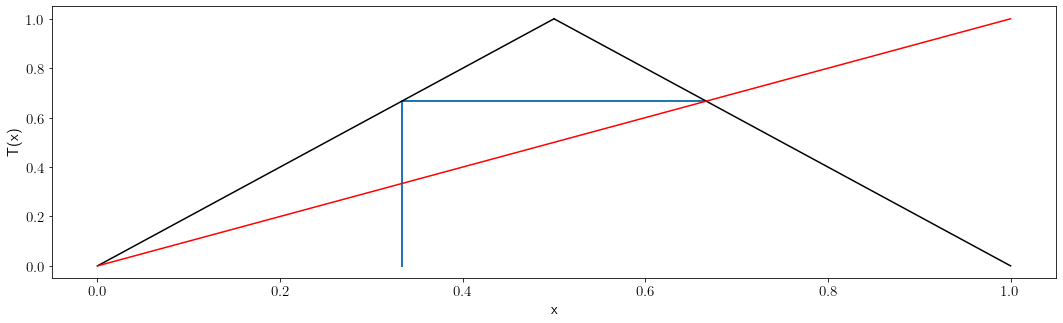

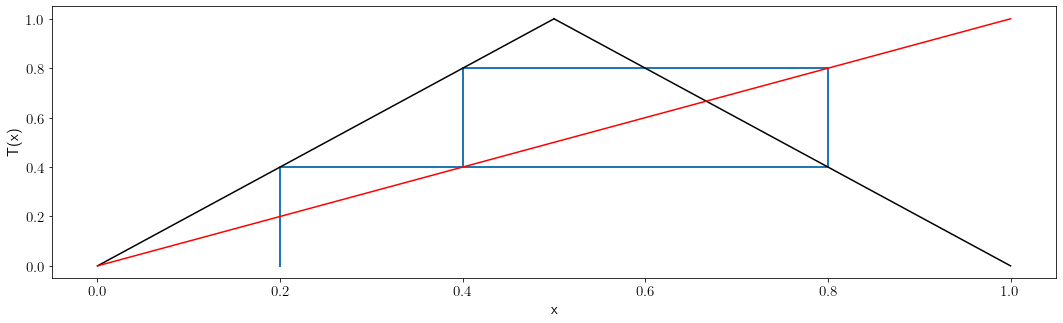

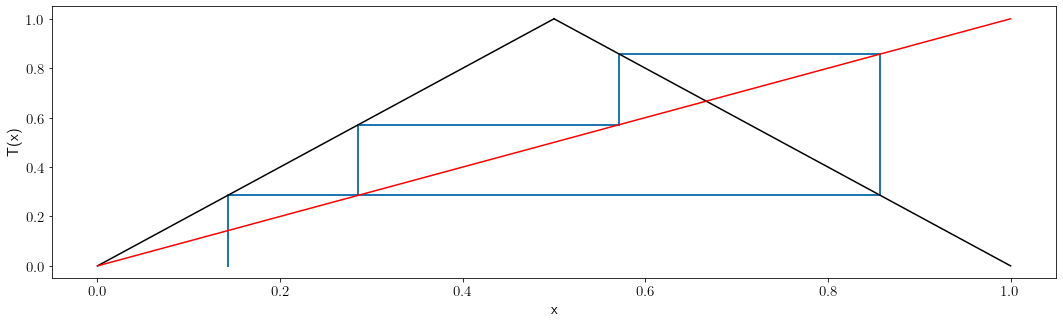

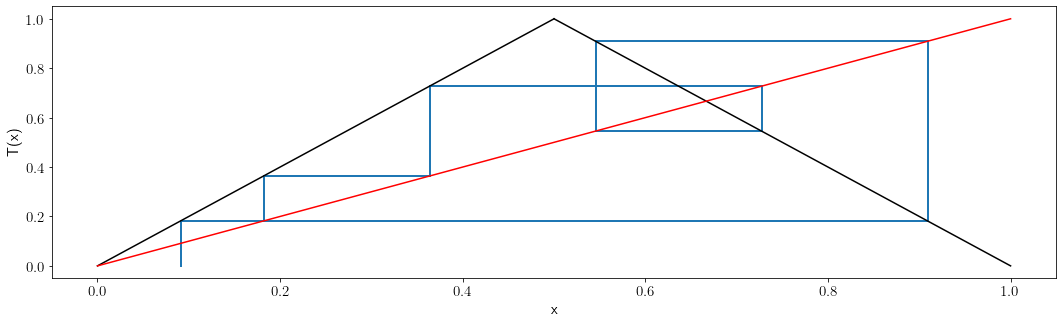

In [140]:
xa=[1,1,1,1]
xb=[3,5,7,11]
r=2
for xa,xb in zip(xa,xb):
    Tri_coweb(xa,xb,r)     

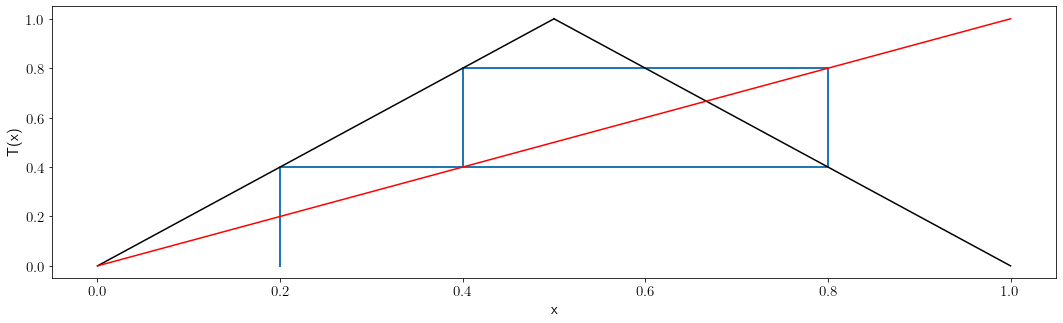

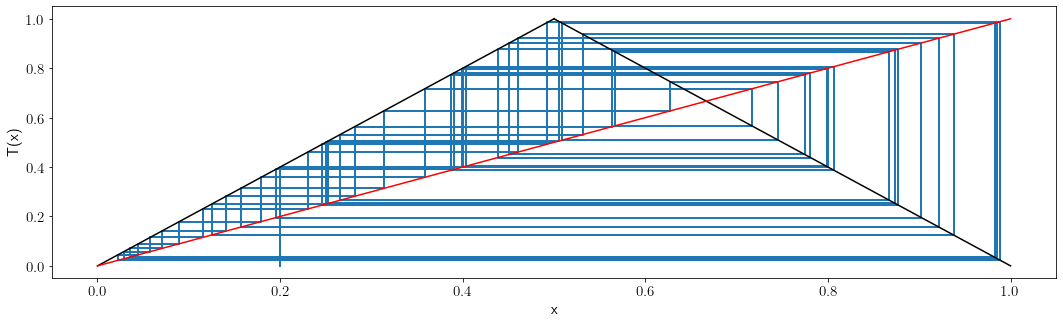

In [141]:
xa=[1,0.2001]
xb=[5,1]
r=2
for xa,xb in zip(xa,xb):
    Tri_coweb(xa,xb,r)    

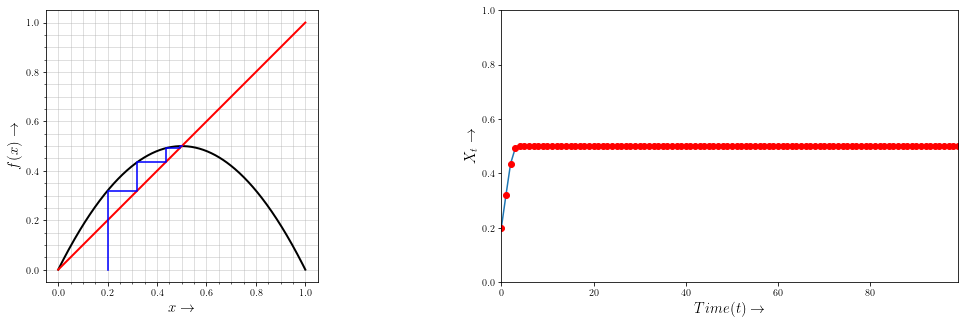

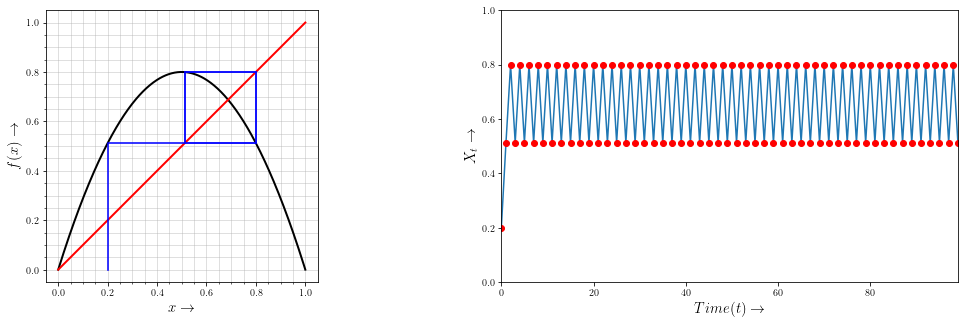

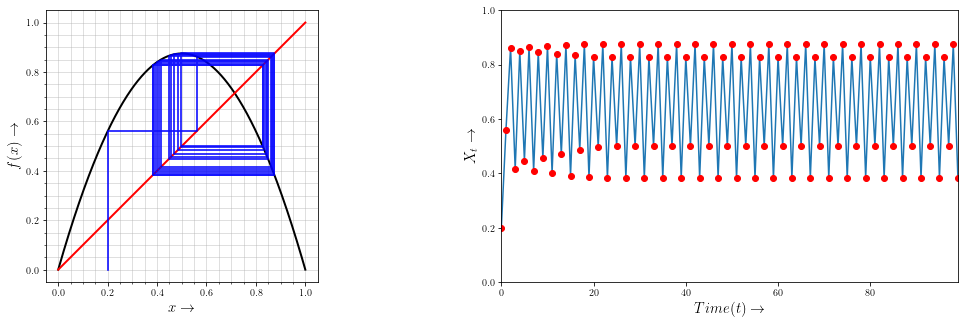

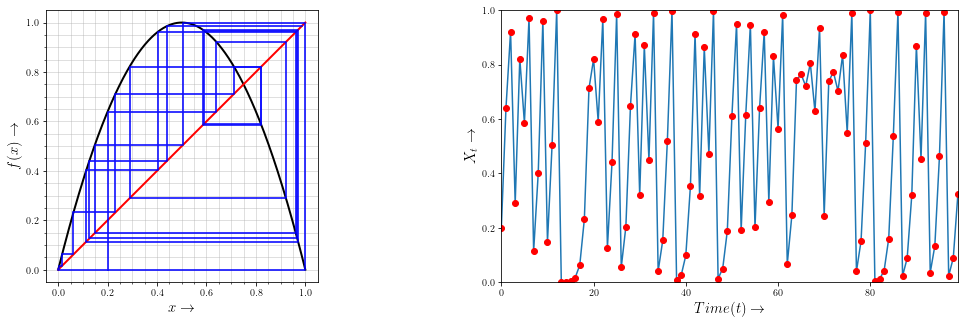

In [81]:
def cobweb(f, r, x0, nmax=50, n_iter=100, n_skip=0):
    T,X_t=[],[]
    t,x=0,x0
    for i in range(n_iter + n_skip):
        if i >= n_skip:
            X_t.append(x)
            T.append(t)
            t+=1
        x = f(x,r)
    
    fig , (ax, ax1)= plt.subplots(1,2)
    ax1.plot(T, X_t,'-', T, X_t, 'ro')
    ax1.set_ylim(0, 1)
    ax1.set_xlim(0, T[-1])
    ax1.set_xlabel(r'$Time(t) \rightarrow $', fontsize=15)
    ax1.set_ylabel(r'$X_t \rightarrow $', fontsize=15)
    x = np.linspace(0, 1, 500)
    ax.plot(x, f(x, r), c='k', lw=2)
    ax.plot(x, x, c='r', lw=2)
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]
    ax.plot(px, py, c='b', alpha=0.7)
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel(r'$x  \rightarrow $', fontsize=15)
    ax.set_ylabel(r'$f(x) \rightarrow $', fontsize=15)
    return None

r = [2, 3.2, 3.5, 4]
x0= 0.2
for r in r:
    cobweb(lambda x,r: r*x*(1-x), r, x0)

Consider the 2-dimensional discrete map defined by
$$x_{n+1} =1+ βx_n − αy^2_n \\
y_{n+1} = x_n,$$
where $α$ and $β$ are constants. Suppose that $α = 1,$ plot iterative plots and power spectra for system when $ β = [ 0.05,0.12, 0.3 ]$

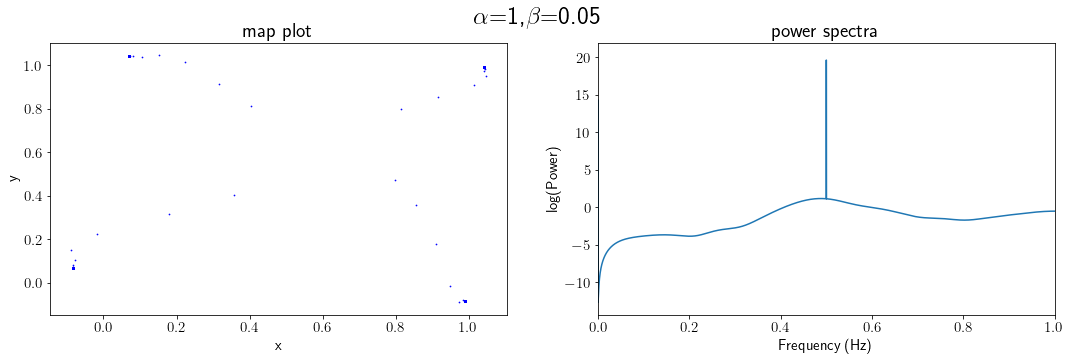

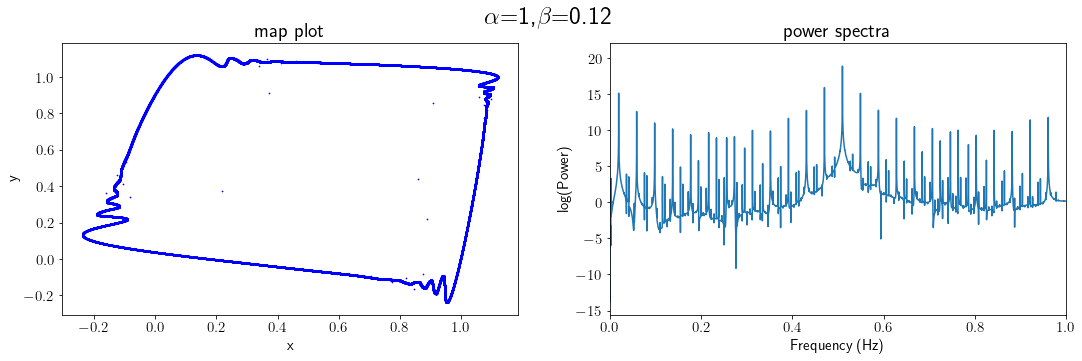

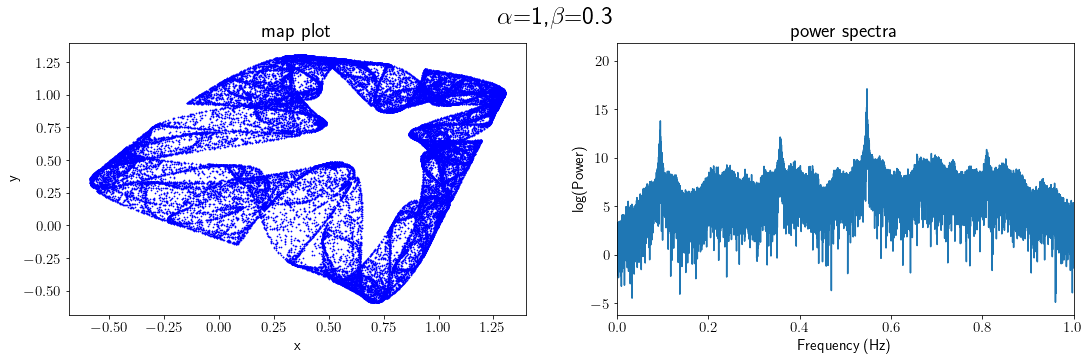

In [78]:
def Iterative_map(a,b,n = 50000):

    def map_2d(X):
        x, y = X
        xn = 1 - a*y**2 + b*x
        yn = x
        return (xn, yn)

    X0 = [(1 - b) / 2, (1 - b) / 2]
    X, Y = [], []
    for i in range(n):
        xn, yn = map_2d(X0)
        X, Y = X + [xn], Y + [yn]
        X0 = [xn, yn]

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(X, Y, color='blue', s=0.5)
    ax1.set_title('map plot ', fontsize=20)
    ax1.set_xlabel('x', fontsize=15)
    ax1.set_ylabel('y', fontsize=15)
    ax1.tick_params(labelsize=15)
    f = np.linspace(-1, 1, n)
    power = np.abs(fft(X)**2)
    power = np.log(power)
    ax2.plot(f, power)
    ax2.set_xlim(0, 1)
    ax2.set_title('power spectra ', fontsize=20)
    ax2.set_xlabel('Frequency (Hz)', fontsize=15)
    ax2.set_ylabel('log(Power)', fontsize=15)
    ax2.tick_params(labelsize=15)
    plt.suptitle(r'$\alpha$={},$\beta$={}'.format(a,b), fontsize=25)
    plt.show()
    
a=1
b=[0.05,0.12,0.3]
for b in b:
    Iterative_map(a,b)    

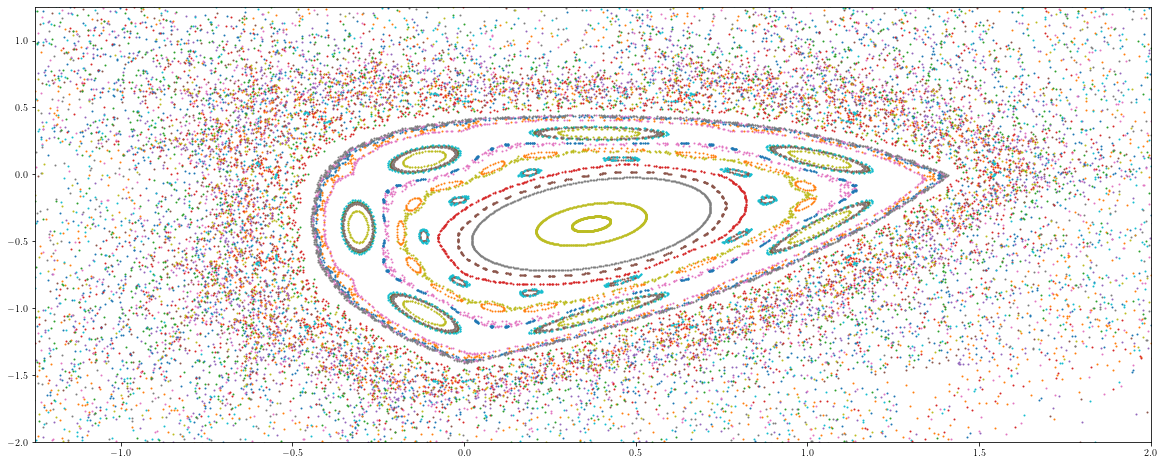

In [2]:

B = -1
C = 0.7
 
np.random.seed(2)
plt.figure(figsize=(20,8))
 
for eloop in range(0,100):
 
    xlast = np.random.normal(0,1,1)
    ylast = np.random.normal(0,1,1)
 
    xnew = np.zeros(shape=(500,))
    ynew = np.zeros(shape=(500,))
    for loop in range(0,500):
        xnew[loop] = 1 + ylast - C*abs(xlast)
        ynew[loop] = B*xlast
        xlast = xnew[loop]
        ylast = ynew[loop]
         
    plt.plot(np.real(xnew),np.real(ynew),'o',ms=1)
    plt.xlim(xmin=-1.25,xmax=2)
    plt.ylim(ymin=-2,ymax=1.25)
    plt.savefig('poincare.jpg',dpi=600)

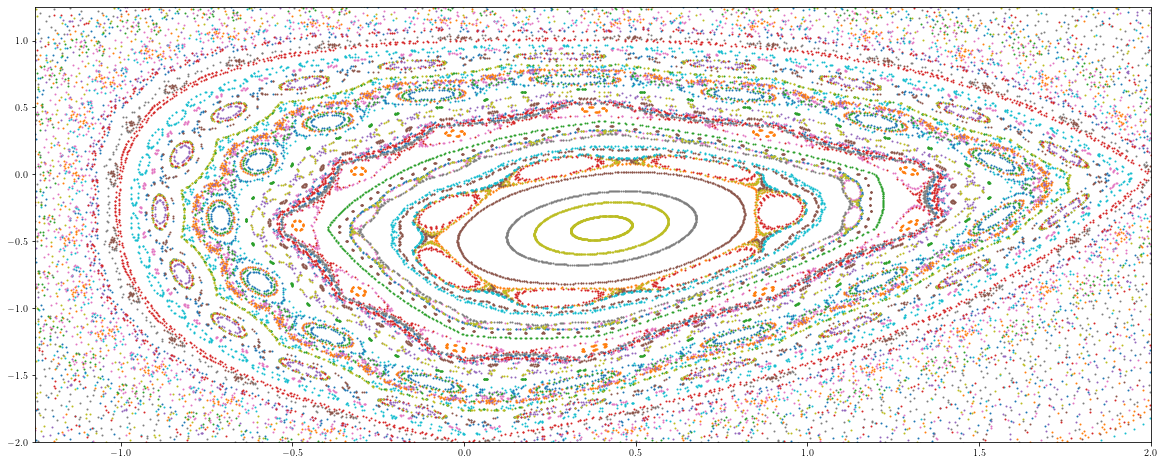

In [3]:

B = -1
C = 0.5
 
np.random.seed(2)
plt.figure(figsize=(20,8))
 
for eloop in range(0,100):
 
    xlast = np.random.normal(0,1,1)
    ylast = np.random.normal(0,1,1)
 
    xnew = np.zeros(shape=(500,))
    ynew = np.zeros(shape=(500,))
    for loop in range(0,500):
        xnew[loop] = 1 + ylast - C*abs(xlast)
        ynew[loop] = B*xlast
        xlast = xnew[loop]
        ylast = ynew[loop]
         
    plt.plot(np.real(xnew),np.real(ynew),'o',ms=1)
    plt.xlim(xmin=-1.25,xmax=2)
    plt.ylim(ymin=-2,ymax=1.25)
    plt.savefig('poincare2.jpg',dpi=600)

Compute the first 10000 iterates of the $\mathbf{H\acute{e}non}$ map
$$x_{n+1} = 1+y_n − \alpha x^2_n, \\ y_{n+1} = \beta x_n$$
where $α$ and $β$ are constants.Use Python to plot a power series spectrum.

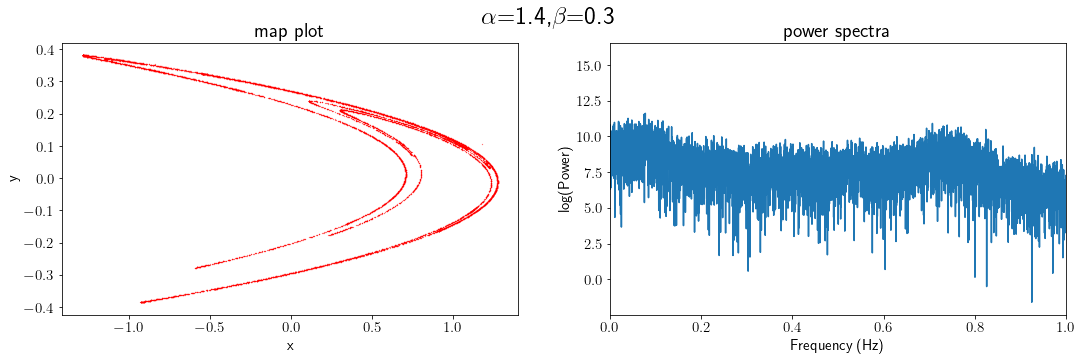

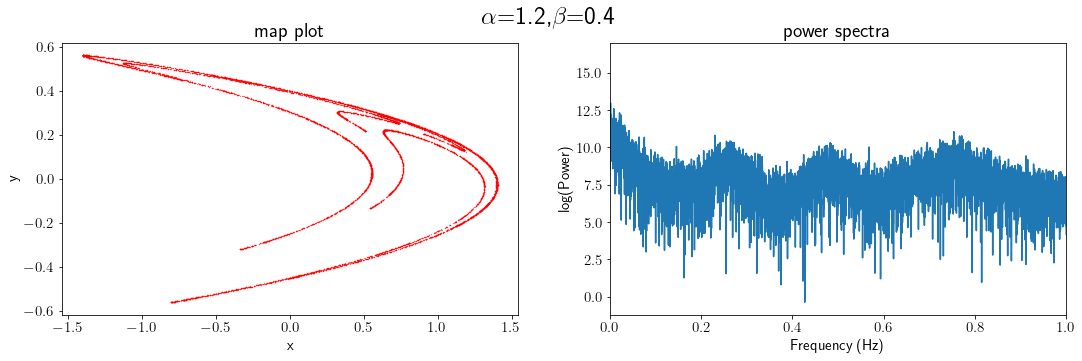

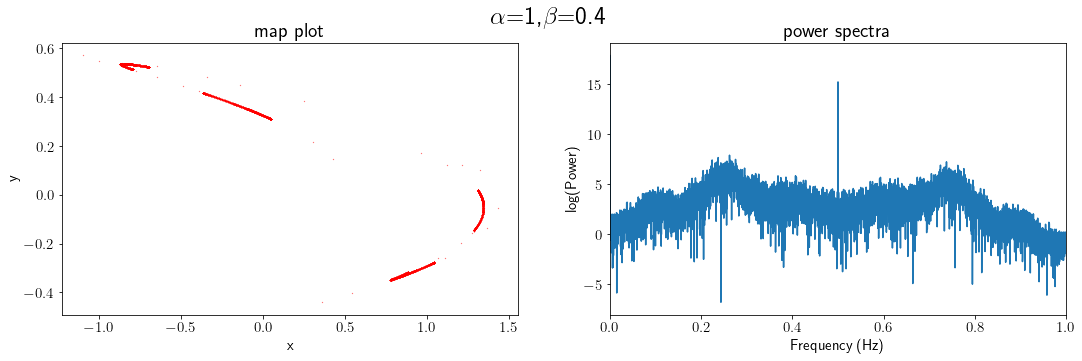

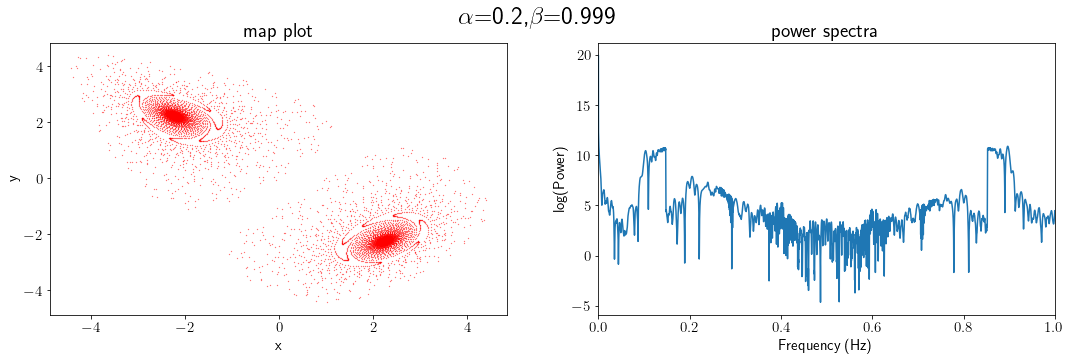

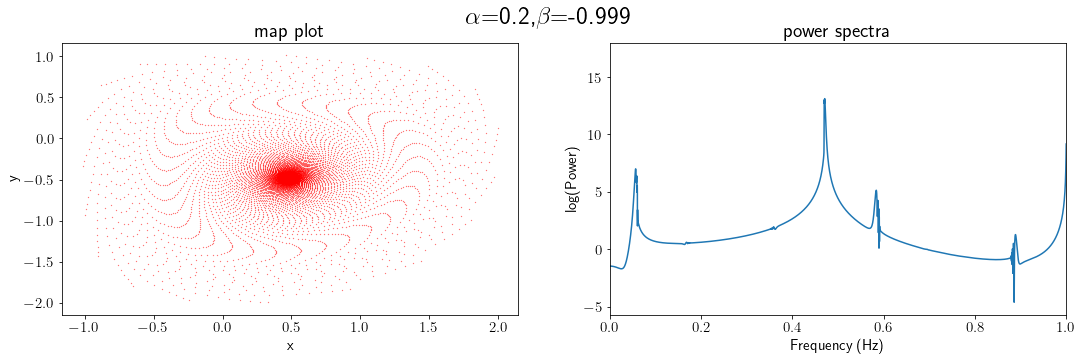

In [79]:
def Henon_map(a,b,n = 10000):

    def map_2d(X):
        x, y = X
        xn = 1 + y - a*x**2
        yn = b*x
        return (xn, yn)

    #X0 = [x0, y0]
    X0 = [(1 - b) / 2, (1 - b) / 2]
    X, Y = [], []
    for i in range(n):
        xn, yn = map_2d(X0)
        X, Y = X + [xn], Y + [yn]
        X0 = [xn, yn]

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(X, Y,color='r', s=0.05)
    ax1.set_title('map plot ', fontsize=20)
    ax1.set_xlabel('x', fontsize=15)
    ax1.set_ylabel('y', fontsize=15)
    ax1.tick_params(labelsize=15)
    f = np.linspace(-1, 1, n)
    power = np.abs(fft(X)**2)
    power = np.log(power)
    ax2.plot(f, power)
    ax2.set_xlim(0, 1)
    ax2.set_title('power spectra ', fontsize=20)
    ax2.set_xlabel('Frequency (Hz)', fontsize=15)
    ax2.set_ylabel('log(Power)', fontsize=15)
    ax2.tick_params(labelsize=15)
    plt.suptitle(r'$\alpha$={},$\beta$={}'.format(a,b), fontsize=25)
    plt.show()

a=[1.4, 1.2, 1, 0.2, 0.2]
b=[0.3, 0.4, 0.4, 0.999, -0.999]
for a,b in zip(a,b):
    Henon_map(a,b,10000)    

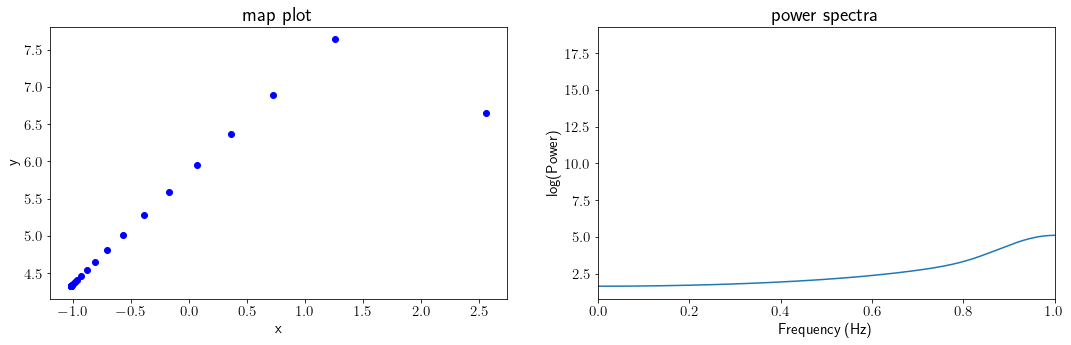

In [80]:
def chaotic_neuromodule(n=10000):
    def p(X):
        x,y=X
        p1= 1/(1+np.exp(-x))
        p2= 1/(1+np.exp(-y))
        return p1,p2
    def map_2d(X):
        x, y = X
        p1,p2=p(X)
        xn = 2+3.5*p1-4*p2
        yn = 3+5*p1
        return (xn, yn)

    X0 = [1, 0]
    X, Y = [], []
    for i in range(n):
        xn, yn = map_2d(X0)
        X, Y = X + [xn], Y + [yn]
        X0 = [xn, yn]

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(X, Y, color='blue')
    ax1.set_title('map plot ', fontsize=20)
    ax1.set_xlabel('x', fontsize=15)
    ax1.set_ylabel('y', fontsize=15)
    ax1.tick_params(labelsize=15)
    f = np.linspace(-1, 1, n)
    power = np.abs(fft(X)**2)
    power = np.log(power)
    ax2.plot(f, power)
    ax2.set_xlim(0, 1)
    ax2.set_title('power spectra ', fontsize=20)
    ax2.set_xlabel('Frequency (Hz)', fontsize=15)
    ax2.set_ylabel('log(Power)', fontsize=15)
    ax2.tick_params(labelsize=15)
    plt.show()
    
chaotic_neuromodule(n=10000)    

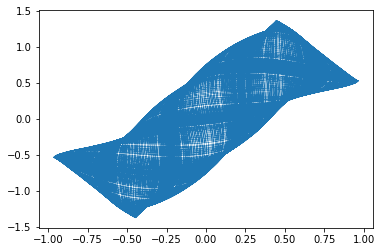

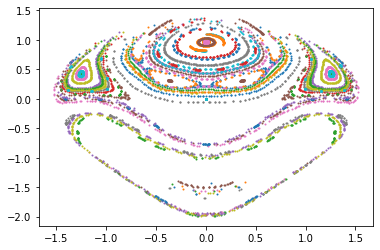

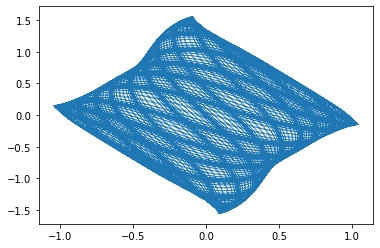

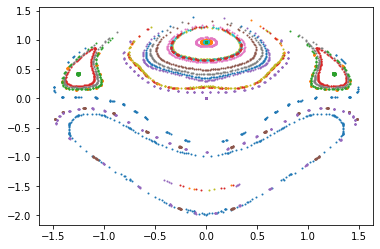

In [1]:
"""
DoublePendulum.py
Created on Oct 16 06:03:32 2020
"Introduction to Modern Dynamics" 2nd Edition (Oxford, 2019)
@author: nolte
"""
 
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
import time
 
plt.close('all')
 
E = 1.       # Try 0.8 to 1.5
 
def flow_deriv(x_y_z_w,tspan):
    x, y, z, w = x_y_z_w
 
    A = w**2*np.sin(y-x);
    B = -2*np.sin(x);
    C = z**2*np.sin(y-x)*np.cos(y-x);
    D = np.sin(y)*np.cos(y-x);
    EE = 2 - (np.cos(y-x))**2;
     
    FF = w**2*np.sin(y-x)*np.cos(y-x);
    G = -2*np.sin(x)*np.cos(y-x);
    H = 2*z**2*np.sin(y-x);
    I = 2*np.sin(y);
    JJ = (np.cos(y-x))**2 - 2;
 
    a = z
    b = w
    c = (A+B+C+D)/EE
    d = (FF+G+H+I)/JJ
    return[a,b,c,d]
 
repnum = 75
 
np.random.seed(1)
for reploop  in range(repnum):
     
     
    px1 = 2*(np.random.random((1))-0.499)*np.sqrt(E);
    py1 = -px1 + np.sqrt(2*E - px1**2);            
 
    xp1 = 0   # Try 0.1
    yp1 = 0   # Try -0.2
     
    x_y_z_w0 = [xp1, yp1, px1, py1]
     
    tspan = np.linspace(1,1000,10000)
    x_t = integrate.odeint(flow_deriv, x_y_z_w0, tspan)
    siztmp = np.shape(x_t)
    siz = siztmp[0]
 
    if reploop % 50 == 0:
        plt.figure(2)
        lines = plt.plot(x_t[:,0],x_t[:,1])
        plt.setp(lines, linewidth=0.5)
        plt.show()
        time.sleep(0.1)
        #os.system("pause")
 
    y1 = np.mod(x_t[:,0]+np.pi,2*np.pi) - np.pi
    y2 = np.mod(x_t[:,1]+np.pi,2*np.pi) - np.pi
    y3 = np.mod(x_t[:,2]+np.pi,2*np.pi) - np.pi
    y4 = np.mod(x_t[:,3]+np.pi,2*np.pi) - np.pi
     
    py = np.zeros(shape=(10*repnum,))
    yvar = np.zeros(shape=(10*repnum,))
    cnt = -1
    last = y1[1]
    for loop in range(2,siz):
        if (last < 0)and(y1[loop] > 0):
            cnt = cnt+1
            del1 = -y1[loop-1]/(y1[loop] - y1[loop-1])
            py[cnt] = y4[loop-1] + del1*(y4[loop]-y4[loop-1])
            yvar[cnt] = y2[loop-1] + del1*(y2[loop]-y2[loop-1])
            last = y1[loop]
        else:
            last = y1[loop]
      
    #plt.figure(3)
    lines = plt.plot(yvar,py,'o',ms=1)
plt.show()

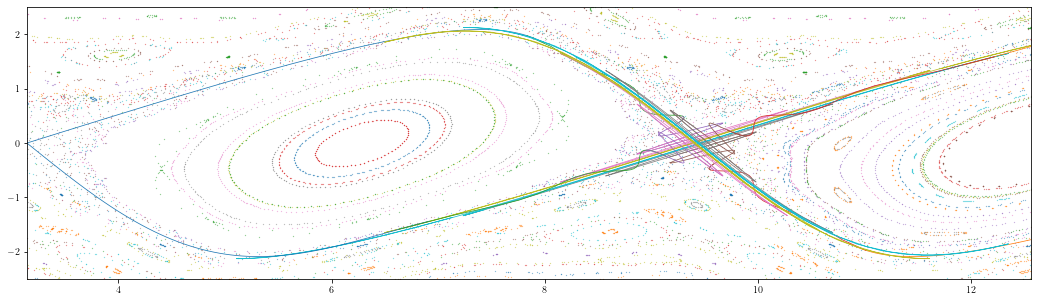

In [9]:
"""
StandmapHom.py
Created on Sun Aug  2  2020
"Introduction to Modern Dynamics" 2nd Edition (Oxford, 2019)
@author: nolte
"""
 
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
 
plt.close('all')
 
eps = 0.97
 
np.random.seed(2)
 
plt.figure(1)
 
for eloop in range(0,100):
 
    rlast = 2*np.pi*(0.5-np.random.random())
    thlast = 4*np.pi*np.random.random()
     
    rplot = np.zeros(shape=(200,))
    thetaplot = np.zeros(shape=(200,))
    for loop in range(0,200):
        rnew = rlast + eps*np.sin(thlast)
        thnew = np.mod(thlast+rnew,4*np.pi)
         
        thetaplot[loop] = np.mod(thnew-np.pi,4*np.pi)     
        rtemp = np.mod(rnew + np.pi,2*np.pi)
        rplot[loop] = rtemp - np.pi
   
        rlast = rnew
        thlast = thnew
         
    plt.plot(np.real(thetaplot),np.real(rplot),'o',ms=0.2)
    plt.xlim(xmin=np.pi,xmax=4*np.pi)
    plt.ylim(ymin=-2.5,ymax=2.5)
         
plt.savefig('StandMap')
 
K = eps
eps0 = 5e-7
 
J = [[1,1+K],[1,1]]
w, v = LA.eig(J)
 
My = w[0]
Vu = v[:,0]     # unstable manifold
Vs = v[:,1]     # stable manifold
 
# Plot the unstable manifold
Hr = np.zeros(shape=(100,150))
Ht = np.zeros(shape=(100,150))
for eloop in range(0,100):
     
    eps = eps0*eloop
 
    roldu1 = eps*Vu[0]
    thetoldu1 = eps*Vu[1]
     
    Nloop = np.ceil(-6*np.log(eps0)/np.log(eloop+2))
    flag = 1
    cnt = 0
     
    while flag==1 and cnt < Nloop:
         
        ru1 = roldu1 + K*np.sin(thetoldu1)
        thetau1 = thetoldu1 + ru1
         
        roldu1 = ru1
        thetoldu1 = thetau1
         
        if thetau1 > 4*np.pi:
            flag = 0
             
        Hr[eloop,cnt] = roldu1
        Ht[eloop,cnt] = thetoldu1 + 3*np.pi
        cnt = cnt+1
     
x = Ht[0:99,12] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[0:99,12]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
del x,y
x = Ht[5:39,15] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[5:39,15]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
del x,y
x = Ht[12:69,16] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[12:69,16]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
del x,y
x = Ht[15:89,17] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[15:89,17]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
del x,y
x = Ht[30:99,18] - 2*np.pi
x2 = 6*np.pi - x
y = Hr[30:99,18]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
# Plot the stable manifold
del Hr, Ht
Hr = np.zeros(shape=(100,150))
Ht = np.zeros(shape=(100,150))
#eps0 = 0.03
for eloop in range(0,100):
     
    eps = eps0*eloop
 
    roldu1 = eps*Vs[0]
    thetoldu1 = eps*Vs[1]
     
    Nloop = np.ceil(-6*np.log(eps0)/np.log(eloop+2))
    flag = 1
    cnt = 0
     
    while flag==1 and cnt < Nloop:
         
        thetau1 = thetoldu1 - roldu1
        ru1 = roldu1 - K*np.sin(thetau1)
 
        roldu1 = ru1
        thetoldu1 = thetau1
         
        if thetau1 > 4*np.pi:
            flag = 0
             
        Hr[eloop,cnt] = roldu1
        Ht[eloop,cnt] = thetoldu1
        cnt = cnt+1
     
x = Ht[0:79,12] + np.pi
x2 = 6*np.pi - x
y = Hr[0:79,12]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
del x,y
x = Ht[4:39,15] + np.pi
x2 = 6*np.pi - x
y = Hr[4:39,15]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
del x,y
x = Ht[12:69,16] + np.pi
x2 =  6*np.pi - x
y = Hr[12:69,16]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
del x,y
x = Ht[15:89,17] + np.pi
x2 =  6*np.pi - x
y = Hr[15:89,17]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)
 
del x,y
x = Ht[30:99,18] + np.pi
x2 =  6*np.pi - x
y = Hr[30:99,18]
y2 = -y
plt.plot(x,y,linewidth =0.75)
plt.plot(x2,y2,linewidth =0.75)

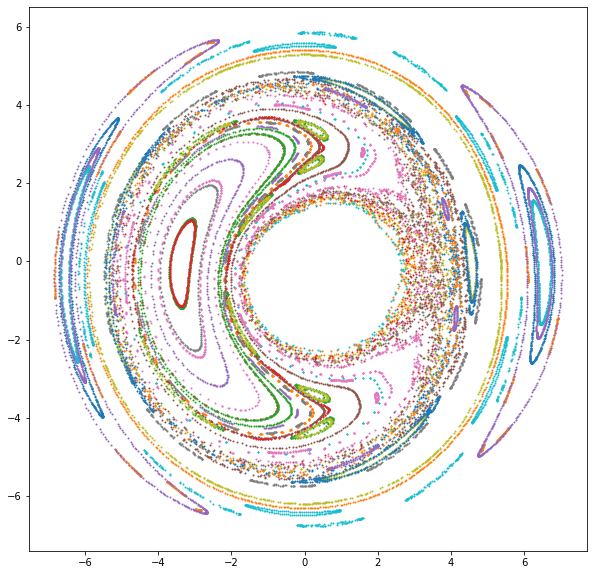

In [1]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
plt.close('all')
 
eps = 0.9
 
np.random.seed(2)
plt.figure(1,figsize=(10,10))
for eloop in range(0,50):
 
    rlast = np.pi*(1.5*np.random.random()-0.5)
    thlast = 2*np.pi*np.random.random()
 
    orbit = int(200*(rlast+np.pi/2))
    rplot = np.zeros(shape=(orbit,))
    thetaplot = np.zeros(shape=(orbit,))
    x = np.zeros(shape=(orbit,))
    y = np.zeros(shape=(orbit,))    
    for loop in range(0,orbit):
        rnew = rlast + eps*np.sin(thlast)
        thnew = np.mod(thlast+rnew,2*np.pi)
         
        rplot[loop] = rnew
        thetaplot[loop] = np.mod(thnew-np.pi,2*np.pi) - np.pi            
           
        rlast = rnew
        thlast = thnew
         
        x[loop] = (rnew+np.pi+0.25)*np.cos(thnew)
        y[loop] = (rnew+np.pi+0.25)*np.sin(thnew)
         
    plt.plot(x,y,'o',ms=1)
plt.show()

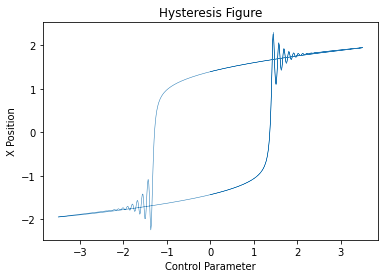

In [17]:
import numpy as np
from scipy import integrate
from scipy import signal
from matplotlib import pyplot as plt
 
plt.close('all')
T = 400
Amp = 3.5
 
def solve_flow(y0,c0,lim = [-3,3,-3,3]):
 
    def flow_deriv(x_y, t, c0):
        #"""Compute the time-derivative of a Medio system."""
        x, y = x_y
 
        return [y,-0.5*y - x**3 + 2*x + x*(2*np.pi/T)*Amp*np.cos(2*np.pi*t/T) 
                + Amp*np.sin(2*np.pi*t/T)]
 
    tsettle = np.linspace(0,T,101)   
    yinit = y0;
    x_tsettle = integrate.odeint(flow_deriv,yinit,tsettle,args=(T,))
    y0 = x_tsettle[100,:]
     
    t = np.linspace(0, 1.5*T, 2001)
    x_t = integrate.odeint(flow_deriv, y0, t, args=(T,))
    c  = Amp*np.sin(2*np.pi*t/T)
         
    return t, x_t, c
 
eps = 0.0001
n=100
xc=np.zeros(n) 
X=np.zeros(n) 
Y=np.zeros(n) 
Z=np.zeros(n) 
for loop in range(0,n):
    c = -1.2 + 2.4*loop/100 + eps
    xc[loop]=c
     
    coeff = [-1, 0, 2, c]
    y = np.roots(coeff)
     
    xtmp = np.real(y[0])
    ytmp = np.real(y[1])
     
    X[loop] = np.min([xtmp,ytmp])
    Y[loop] = np.max([xtmp,ytmp])
    Z[loop]= np.real(y[2])
 
y0 = [1.9, 0]
c0 = -2.
t, x_t, c = solve_flow(y0,c0)
y1 = x_t[:,0]
y2 = x_t[:,1]

""" 
plt.figure(1)
lines = plt.plot(xc,X,xc,Y,xc,Z)
plt.setp(lines, linewidth=0.5)

plt.title('Roots')
plt.show() 

 
plt.figure(2)
lines = plt.plot(t,y1)
plt.setp(lines, linewidth=0.5)

plt.ylabel('X Position')
plt.xlabel('Time')
plt.show() """

plt.figure(3)
lines = plt.plot(c,y1)
plt.setp(lines, linewidth=0.5)

plt.ylabel('X Position')
plt.xlabel('Control Parameter')
plt.title('Hysteresis Figure')
plt.show()

 
Duffing.py


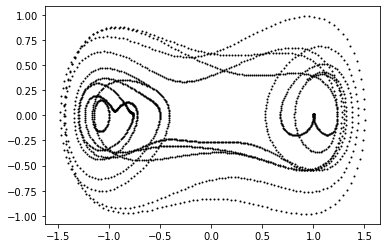

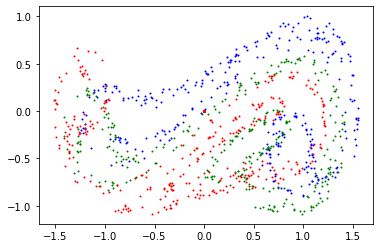

In [14]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
 
plt.close('all')
 
# model_case 1 = Pendulum
print(' ')
print('Duffing.py')
 
alpha = -1       # -1
beta = 1         # 1
delta = 0.3       # 0.3
gam = 0.15   # 0.15
w = 1
def flow_deriv(x_y_z,tspan):
    x, y, z = x_y_z
    a = y
    b = delta*np.cos(w*tspan) - alpha*x - beta*x**3 - gam*y
    c = w
    return[a,b,c]
                 
T = 2*np.pi/w
 
px1 = np.random.rand(1)
xp1 = np.random.rand(1)
w1 = 0
 
x_y_z = [xp1, px1, w1]
 
# Settle-down Solve for the trajectories
t = np.linspace(0, 2000, 40000)
x_t = integrate.odeint(flow_deriv, x_y_z, t)

tspan = np.linspace(1,20000,400000)

siztmp = np.shape(x_t)
siz = siztmp[0]
 
y1 = x_t[:,0]
y2 = x_t[:,1]
y3 = x_t[:,2]
     
plt.figure(2)
lines = plt.plot(y1[1:2000],y2[1:2000],'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
 
for cloop in range(0,3):
 
   #phase = np.random.rand(1)*np.pi;
    phase = np.pi*cloop/3
 
    repnum = 5000
    px = np.zeros(shape=(2*repnum,))
    xvar = np.zeros(shape=(2*repnum,))
    cnt = -1
    testwt = np.mod(tspan-phase,T)-0.5*T;
    last = testwt[1]
    for loop in range(2,siz):
        if (last < 0)and(testwt[loop] > 0):
            cnt = cnt+1
            del1 = -testwt[loop-1]/(testwt[loop] - testwt[loop-1])
            px[cnt] = (y2[loop]-y2[loop-1])*del1 + y2[loop-1]
            xvar[cnt] = (y1[loop]-y1[loop-1])*del1 + y1[loop-1]
            last = testwt[loop]
        else:
            last = testwt[loop]
  
    plt.figure(3)
    if cloop == 0:
        lines = plt.plot(xvar,px,'bo',ms=1)
    elif cloop == 1:
        lines = plt.plot(xvar,px,'go',ms=1)
    else:
        lines = plt.plot(xvar,px,'ro',ms=1)
         
plt.show()

 
Duffing.py


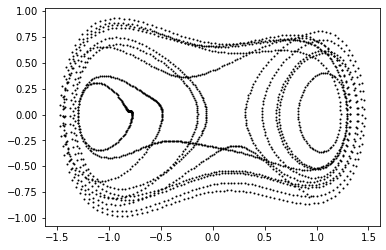

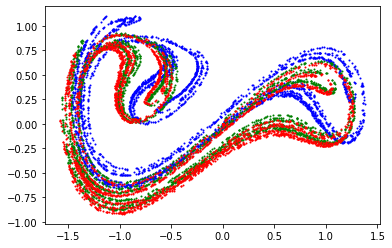

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Duffing.py
Created on Wed May 21 06:03:32 2018
@author: nolte
"""
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
 
plt.close('all')
 
# model_case 1 = Pendulum
# model_case 2 = Double Well
print(' ')
print('Duffing.py')
 
alpha = -1       # -1
beta = 1         # 1
delta = 0.3       # 0.3
gam = 0.15    # 0.15
w = 1
def flow_deriv(x_y_z,tspan):
    x, y, z = x_y_z
    a = y
    b = delta*np.cos(w*tspan) - alpha*x - beta*x**3 - gam*y
    c = w
    return[a,b,c]
                 
T = 2*np.pi/w
 
px1 = np.random.rand(1)
xp1 = np.random.rand(1)
w1 = 0
 
x_y_z = [xp1, px1, w1]
 
# Settle-down Solve for the trajectories
t = np.linspace(0, 2000, 40000)
x_t = integrate.odeint(flow_deriv, x_y_z, t)
x0 = x_t[39999,0:3]
 
tspan = np.linspace(1,20000,400000)
x_t = integrate.odeint(flow_deriv, x0, tspan)
siztmp = np.shape(x_t)
siz = siztmp[0]
 
y1 = x_t[:,0]
y2 = x_t[:,1]
y3 = x_t[:,2]
     
plt.figure(2)
lines = plt.plot(y1[1:2000],y2[1:2000],'ko',ms=1)
plt.setp(lines, linewidth=0.5)
plt.show()
 
for cloop in range(0,3):
 
    phase = np.random.rand(1)*np.pi;
    #phase = np.pi*cloop/3
 
    repnum = 5000
    px = np.zeros(shape=(2*repnum,))
    xvar = np.zeros(shape=(2*repnum,))
    cnt = -1
    testwt = np.mod(tspan-phase,T)-0.5*T;
    last = testwt[1]
    for loop in range(2,siz):
        if (last < 0)and(testwt[loop] > 0):
            cnt = cnt+1
            del1 = -testwt[loop-1]/(testwt[loop] - testwt[loop-1])
            px[cnt] = (y2[loop]-y2[loop-1])*del1 + y2[loop-1]
            xvar[cnt] = (y1[loop]-y1[loop-1])*del1 + y1[loop-1]
            last = testwt[loop]
        else:
            last = testwt[loop]
  
    plt.figure(3)
    if cloop == 0:
        lines = plt.plot(xvar,px,'bo',ms=1)
    elif cloop == 1:
        lines = plt.plot(xvar,px,'go',ms=1)
    else:
        lines = plt.plot(xvar,px,'ro',ms=1)
         
plt.show()

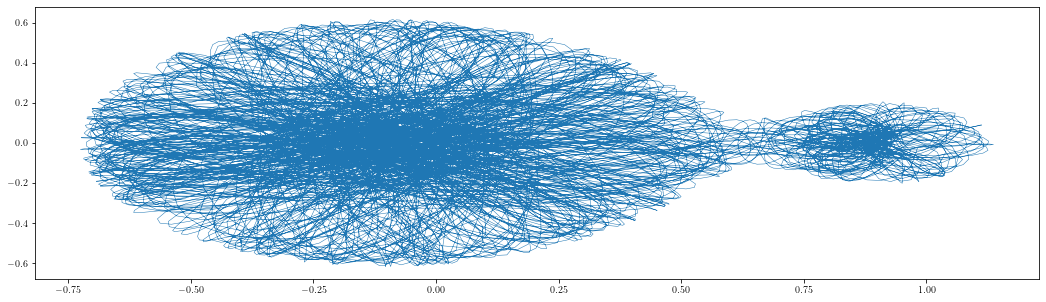

In [21]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
 
plt.close('all')
 
womega = 1
R = 1
eps = 1e-6
 
M1 = 1     # Mass of the Earth
M2 = 1/10    # Mass of the Moon
chsi = M2/M1
 
x1 = -M2*R/(M1+M2)    # Earth location in rotating frame
x2 = x1 + R     # Moon location
 
def poten(y,c):
     
    rp0 = np.sqrt(y**2 + c**2);
    thetap0 = np.arctan(y/c);
         
    rp1 = np.sqrt(x1**2 + rp0**2 - 2*np.abs(rp0*x1)*np.cos(np.pi-thetap0));
    rp2 = np.sqrt(x2**2 + rp0**2 - 2*np.abs(rp0*x2)*np.cos(thetap0));
    V = -M1/rp1 -M2/rp2 - E;
      
    return [V]
 
def flow_deriv(x_y_z,tspan):
    x, y, z, w = x_y_z
     
    r1 = np.sqrt(x1**2 + x**2 - 2*np.abs(x*x1)*np.cos(np.pi-z));
    r2 = np.sqrt(x2**2 + x**2 - 2*np.abs(x*x2)*np.cos(z));
         
    yp = np.zeros(shape=(4,))
    yp[0] = y
    yp[1] = -womega**2*R**3*(np.abs(x)-np.abs(x1)*np.cos(np.pi-z))/(r1**3+eps) \
            -womega**2*R**3*chsi*(np.abs(x)-abs(x2)*np.cos(z))/(r2**3+eps) + x*(w-womega)**2
    yp[2] = w
    yp[3] = 2*y*(womega-w)/x - womega**2*R**3*chsi*abs(x2)*np.sin(z)/(x*(r2**3+eps)) \
            + womega**2*R**3*np.abs(x1)*np.sin(np.pi-z)/(x*(r1**3+eps))
     
    return yp
                 
r0 = 0.64   # initial radius
v0 = 0.3    # initial radial speed
theta0 = 0   # initial angle
vrfrac = 1   # fraction of speed in radial versus angular directions
 
rp1 = np.sqrt(x1**2 + r0**2 - 2*np.abs(r0*x1)*np.cos(np.pi-theta0))
rp2 = np.sqrt(x2**2 + r0**2 - 2*np.abs(r0*x2)*np.cos(theta0))
V = -M1/rp1 - M2/rp2
T = 0.5*v0**2
E = T + V
 
vr = vrfrac*v0
W = (2*T - v0**2)/r0
 
y0 = [r0, vr, theta0, W]   # This is where you set the initial conditions
 
tspan = np.linspace(1,2000,20000)
 
y = integrate.odeint(flow_deriv, y0, tspan)
 
xx = y[1:20000,0]*np.cos(y[1:20000,2])
yy = y[1:20000,0]*np.sin(y[1:20000,2])
 
plt.figure(1)
lines = plt.plot(xx,yy)
plt.setp(lines, linewidth=0.5)
plt.show()    

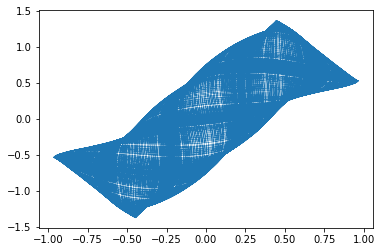

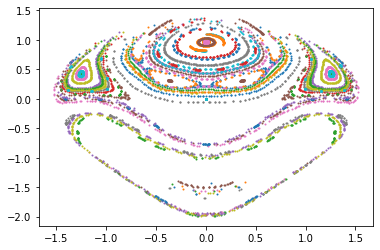

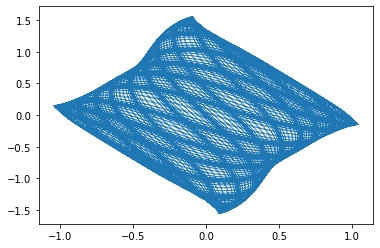

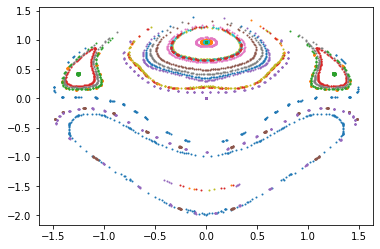

In [9]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
import time
 
plt.close('all')
 
E = 1.       # Try 0.8 to 1.5
 
def flow_deriv(x_y_z_w,tspan):
    x, y, z, w = x_y_z_w
 
    A = w**2*np.sin(y-x);
    B = -2*np.sin(x);
    C = z**2*np.sin(y-x)*np.cos(y-x);
    D = np.sin(y)*np.cos(y-x);
    EE = 2 - (np.cos(y-x))**2;
     
    FF = w**2*np.sin(y-x)*np.cos(y-x);
    G = -2*np.sin(x)*np.cos(y-x);
    H = 2*z**2*np.sin(y-x);
    I = 2*np.sin(y);
    JJ = (np.cos(y-x))**2 - 2;
 
    a = z
    b = w
    c = (A+B+C+D)/EE
    d = (FF+G+H+I)/JJ
    return[a,b,c,d]
 
repnum = 75
 
np.random.seed(1)
for reploop  in range(repnum):
    px1 = 2*(np.random.random((1))-0.499)*np.sqrt(E);
    py1 = -px1 + np.sqrt(2*E - px1**2);            
    xp1 = 0   # Try 0.1
    yp1 = 0   # Try -0.2
    x_y_z_w0 = [xp1, yp1, px1, py1]
    tspan = np.linspace(1,1000,10000)
    x_t = integrate.odeint(flow_deriv, x_y_z_w0, tspan)
    siztmp = np.shape(x_t)
    siz = siztmp[0]
 
    if reploop % 50 == 0:
        plt.figure(2)
        lines = plt.plot(x_t[:,0],x_t[:,1])
        plt.setp(lines, linewidth=0.5)
        plt.show()
        time.sleep(0.1)
        #os.system("pause")
 
    y1 = np.mod(x_t[:,0]+np.pi,2*np.pi) - np.pi
    y2 = np.mod(x_t[:,1]+np.pi,2*np.pi) - np.pi
    y3 = np.mod(x_t[:,2]+np.pi,2*np.pi) - np.pi
    y4 = np.mod(x_t[:,3]+np.pi,2*np.pi) - np.pi
     
    py = np.zeros(shape=(10*repnum,))
    yvar = np.zeros(shape=(10*repnum,))
    cnt = -1
    last = y1[1]
    for loop in range(2,siz):
        if (last < 0)and(y1[loop] > 0):
            cnt = cnt+1
            del1 = -y1[loop-1]/(y1[loop] - y1[loop-1])
            py[cnt] = y4[loop-1] + del1*(y4[loop]-y4[loop-1])
            yvar[cnt] = y2[loop-1] + del1*(y2[loop]-y2[loop-1])
            last = y1[loop]
        else:
            last = y1[loop]
      
    plt.figure(3)
    lines = plt.plot(yvar,py,'o',ms=1)
plt.show()

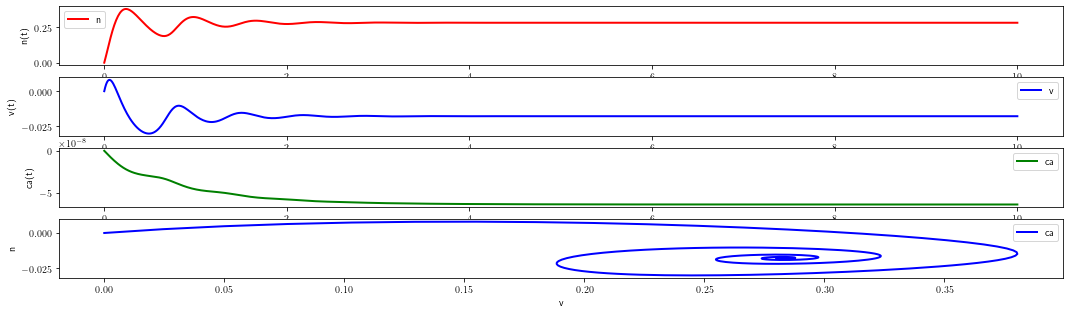

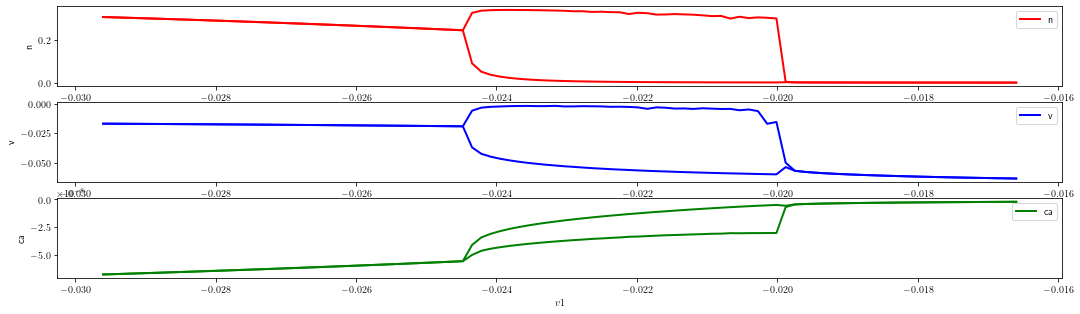

In [22]:
import numpy as np
from scipy import integrate
import sympy as sm
import matplotlib.pyplot as plt
#%matplotlib inline




def func(Y,t,v1,v2,v4,v5,v6,ca3,ca4,phi,vl,vk,vca,gk,gl,gc,c,kd,bt,alpha,kca):
    #n =Y[0], v =Y[1] , ca =Y[2]
    v3=(-v5/2)*np.tanh((Y[2]-ca3)/ca4)+v6
    return np.array([phi*np.cosh((Y[1]-v3)/(2*v4))*(0.5*(1+np.tanh((Y[1]-v3)/v4))-Y[0]),
                     1/c*(-gl*(Y[1]-vl)-gk*Y[0]*(Y[1]-vk)-gc*0.5*(1+np.tanh((Y[1]-v1)/v2))*(Y[1]-vca)),
                    ((-alpha*gc*0.5*(1+np.tanh((Y[1]-v1)/v2))-kca*Y[2])*((kd+Y[2])**2/((kd+Y[2])**2+kd*bt)))])

# to generate the x-axes
t= np.linspace(0,10,1000)

#initial values

func0= [0,0, 0]  # [N,V,CA]

pars =  (-0.0275,0.025,0.0145,0.008,-0.015,4.0e-7,1.5e-7,2.664,-0.07,-0.09,0.08,3.1416e-13,7.854e-14,1.57e-13,1.9635e-14,1.0e-6,1.0e-4,7.9976e7,1.3567537e2)

Y = integrate.odeint(func, func0, t, pars)

n,v,ca = Y.T

# the plots
plt.subplot(4,1,1)
plt.plot(t, n, 'r', linewidth=2,label='n')
plt.xlabel('t')
plt.ylabel('n(t)')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(t, v, 'b',linewidth=2, label='v')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(t,ca, 'g',linewidth=2, label='ca')
plt.xlabel('t')
plt.ylabel('ca(t)')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(n,v, 'b',linewidth=2, label='ca')
plt.xlabel('v')
plt.ylabel('n')
plt.legend(loc='best')

######################################################################################################################

# to store the max_min of the solutions
Ymin = []
Ymax = []
V_1 = np.linspace(-0.0296, -0.0166, 100)
t = np.linspace(0, 100,1000)

for v1 in V_1:
    pars = (v1,0.025,0.0145,0.008,-0.015,4.0e-7,1.5e-7,2.664,-0.07,-0.09,0.08,3.1416e-13,7.854e-14,1.57e-13,1.9635e-14,1.0e-6,1.0e-4,7.9976e7,1.3567537e2)

    # integrate again the equation, with new parameters
    Y = integrate.odeint(func, func0, t, pars)

    # appending the result to the list
    Ymin.append(Y[-60:,:].min(axis=0))
    Ymax.append(Y[-60:,:].max(axis=0))

# convert the lists into arrays
Ymin = np.asarray(Ymin)
Ymax = np.asarray(Ymax)

# plot the bifurcation diagram
plt.figure()

plt.subplot(3,1,1)
plt.plot(V_1, Ymin[:,0], 'r', linewidth=2,label='n')
plt.plot(V_1, Ymax[:,0], 'r',linewidth=2)
plt.xlabel('$v1$')
plt.ylabel('n')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(V_1, Ymin[:,1], 'b',linewidth=2, label='v')
plt.plot(V_1, Ymax[:,1], 'b', linewidth=2)
plt.xlabel('$v1$')
plt.ylabel('v')
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.plot(V_1, Ymin[:,2], 'g',linewidth=2, label='ca')
plt.plot(V_1, Ymax[:,2], 'g',linewidth=2)
plt.xlabel('$v1$')
plt.ylabel('ca')
plt.legend(loc='best')

plt.show()